# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Nafiz
- **Email:** m001d4ky1780@bangkit.academy
- **ID Dicoding:** muhammad_nafiz_m001d4ky1780_VKdn

## Menentukan Pertanyaan Bisnis

- Kapan Kadar NO2 di Kota Changping bernilai tinggi ?
- Kapan Kadar NO2 di Kota Changping bernilai rendah ?
- Berapa periode musiman dari kadar NO2 di Kota Changping ?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd

## Data Wrangling

### Gathering Data

In [5]:
url_data = "https://raw.githubusercontent.com/MNafiz/dashboard-dicoding-bangkit-2024/main/data/PRSA_Data_Changping_20130301-20170228.csv"
data = pd.read_csv(url_data)
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Assessing Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


- Informasi yang menunjukkan waktu masih terpisah, yaitu pada kolom year, month, dan day sehingga akan dilakukan penggabungan dan casting ke tipe data date
- Pada peubah NO2 terdapat missing value sehingga akan dilakukan drop null value sebagai upaya cleaning data

### Cleaning Data

In [8]:
data["date"] = pd.to_datetime(data["year"].astype(str) + "-" + data["month"].astype(str) + "-" + data["day"].astype(str))

data_clean = data[["date", "NO2"]].dropna().copy()

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
data_clean[["NO2"]].describe()

,NO2
count,34397.000000
mean,44.182086
std,29.519796
min,1.847700
25%,22.000000
50%,36.000000
75%,60.358200
max,226.000000


<Axes: >

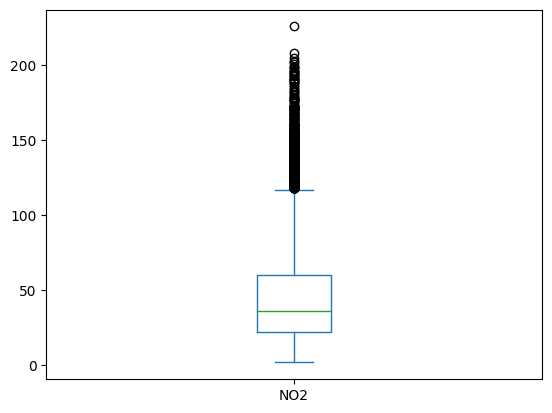

In [10]:
data_clean.plot.box()

## Visualization & Explanatory Analysis

### Kapan Kadar NO2 di Kota Changping bernilai tinggi ?

<Axes: xlabel='date'>

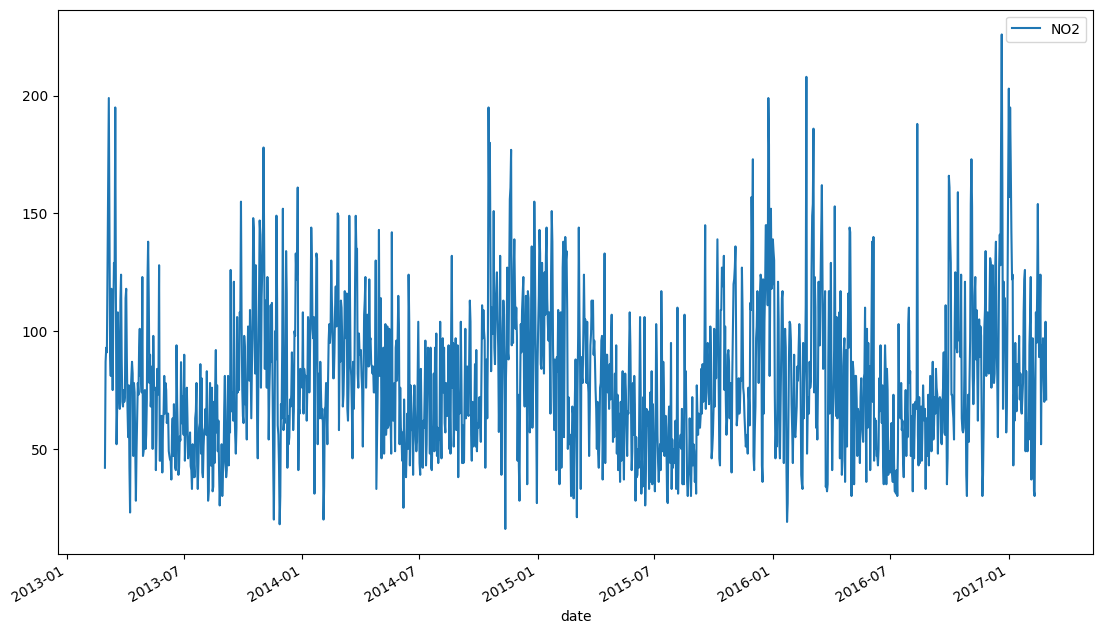

In [13]:
data_clean.groupby("date").max().plot.line(figsize=(8 * 1.67, 8))

### Kapan Kadar NO2 di Kota Changping bernilai rendah ?

<Axes: xlabel='date'>

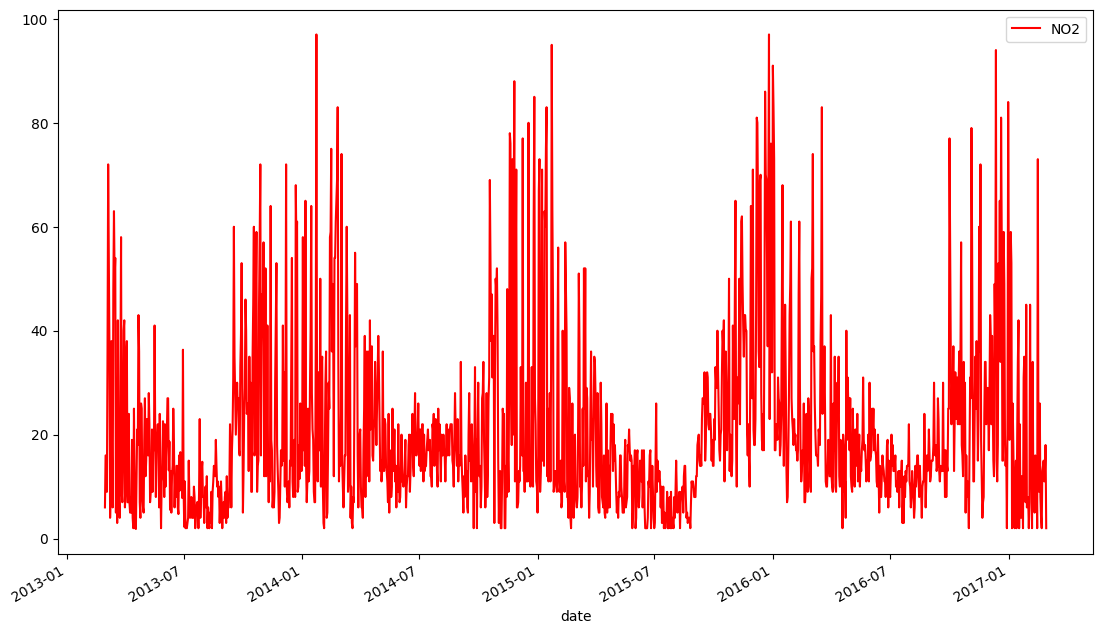

In [14]:
data_clean.groupby("date").min().plot.line(figsize=(8 * 1.67, 8), color="red")

### Berapa periode musiman dari kadar NO2 di Kota Changping ?

<Axes: xlabel='date'>

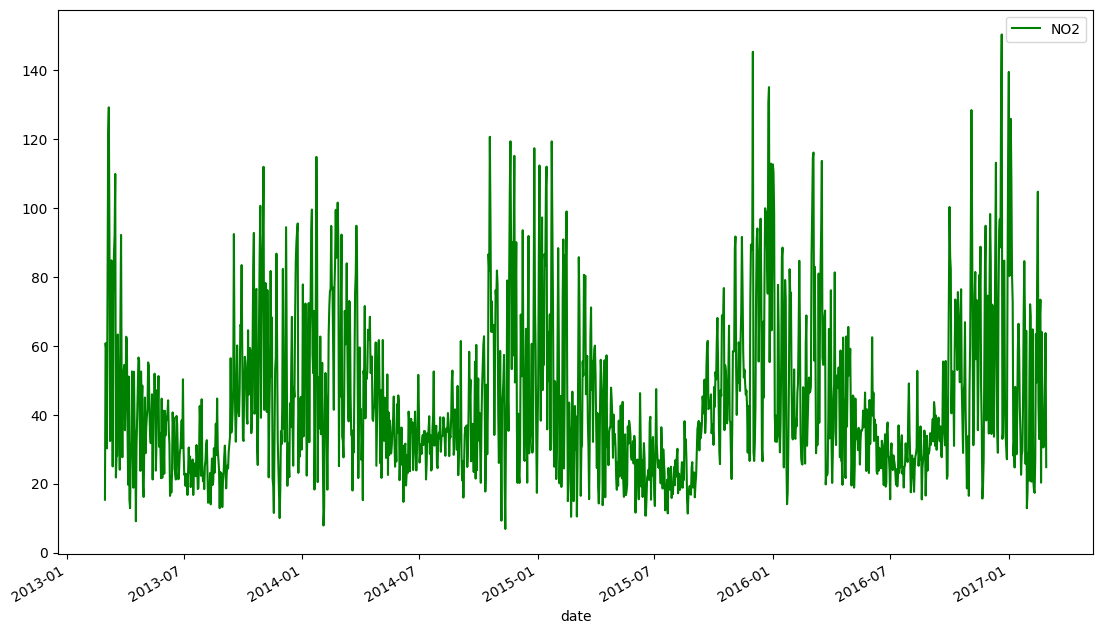

In [16]:
data_clean.groupby("date").mean().plot.line(figsize=(8 * 1.67, 8), color="green")

## Conclusion

- Kadar NO2 paling tinggi di kota ChangPing ketika di penghujung tahun (awal tahun atau akhir tahun)
- Kadar NO2 paling rendah di kota ChangPing ketika berada di pertengahan tahun
- Pola NO2 memiliki siklus musiman yaitu tiap 1 tahun sekali